<a href="https://colab.research.google.com/github/AyushiKashyapp/NLP/blob/main/Resume_Screening.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Resume Screening with Python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [3]:
resume_dataset = pd.read_csv('/kaggle/UpdatedResumeDataSet.csv', encoding = 'utf-8')
resume_dataset['cleaned_resume'] = ''
resume_dataset.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",


Checking the categories of Resume present in the dataset.

In [4]:
print("Displaying the different categories of resume:")
print(resume_dataset['Category'].unique())

Displaying the different categories of resume:
['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']


Displaying the number of resume present for each category.

In [5]:
print("Number of Resume available for each category:")
print(resume_dataset['Category'].value_counts())

Number of Resume available for each category:
Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64


Visualizing the number of categories.

<Axes: xlabel='count', ylabel='Category'>

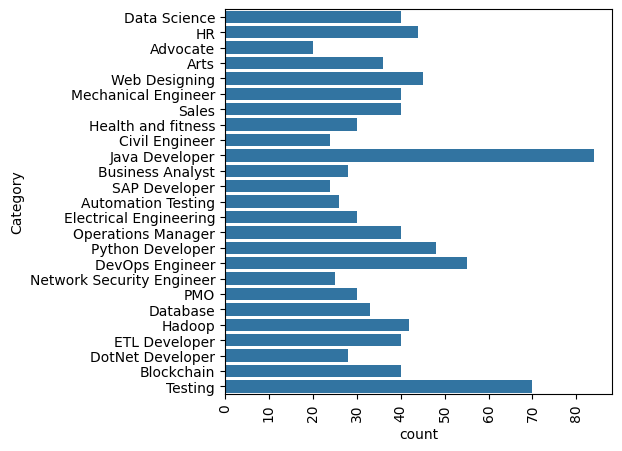

In [9]:
import seaborn as sns
plt.figure(figsize = (5, 5))
plt.xticks(rotation = 90)
sns.countplot(y="Category", data=resume_dataset)

Text Cleaning: Removing URLs, mentions, special characters.

In [10]:
import re

def text_cleaning(text):

  text = re.sub('http\S+\s*', '', text) #remove URLs
  text = re.sub('RT|cc', '', text) #remove RT and CC
  text = re.sub('#\S+','', text) #remove #
  text = re.sub('@\S+','', text) #remove @
  text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', text) #remove punctuations
  text = re.sub(r'[^\x00-\x7f]',r' ', text)
  text = re.sub('\s+', ' ', text) #remove extra whitespace

  return text

resume_dataset['cleaned_resume'] = resume_dataset.Resume.apply(lambda x: text_cleaning(x))

Creating a WordCloud with the most number of words.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('Details', 484), ('Exprience', 446), ('months', 376), ('company', 330), ('description', 310), ('1', 290), ('year', 232), ('January', 216), ('Less', 204), ('Data', 200), ('data', 192), ('Skill', 166), ('Maharashtra', 166), ('6', 164), ('Python', 156), ('Science', 154), ('I', 146), ('Education', 142), ('College', 140), ('The', 126), ('project', 126), ('like', 126), ('Project', 124), ('Learning', 116), ('India', 114), ('Machine', 112), ('University', 112), ('Web', 106), ('using', 104), ('monthsCompany', 102), ('B', 98), ('C', 98), ('SQL', 96), ('time', 92), ('learning', 90), ('Mumbai', 90), ('Pune', 90), ('Arts', 90), ('application', 84), ('Engineering', 78), ('24', 76), ('various', 76), ('Software', 76), ('Responsibilities', 76), ('Nagpur', 76), ('development', 74), ('Management', 74), ('projects', 74), ('Technologies', 72), ('Used', 72)]


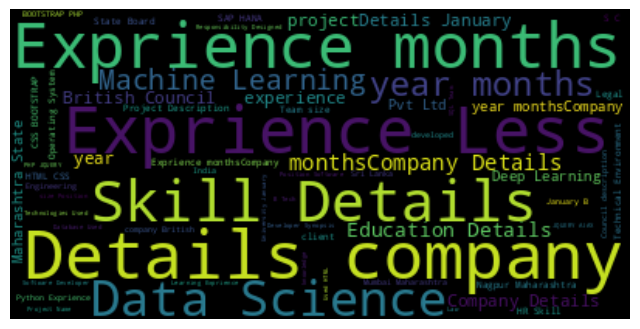

In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('punkt')
import string
from wordcloud import WordCloud

oneSetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords = []
sentences = resume_dataset['Resume'].values
cleanedSentences = ""

for i in range(0,160):
  cleanedText = text_cleaning(sentences[i])
  cleanedSentences += cleanedText
  requiredWords = nltk.word_tokenize(cleanedText)
  for word in requiredWords:
    if word not in oneSetOfStopWords and word not in string.punctuation:
      totalWords.append(word)

wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(50)
print(mostcommon)

wc = WordCloud().generate(cleanedSentences)
plt.figure(figsize = (8,8))
plt.imshow(wc, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Converting these words into Categorical values.

In [14]:
from sklearn.preprocessing import LabelEncoder

var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
  resume_dataset[i] = le.fit_transform(resume_dataset[i])

Training Machine Learning Model for Resume Screening using the KNeighborsClassifier.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

requiredText = resume_dataset['cleaned_resume'].values
requiredTarget = resume_dataset['Category'].values

word_vectorizer = TfidfVectorizer(
    sublinear_tf = True,
    stop_words = 'english',
    max_features = 1500
)
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

print("Feature completed")

x_train, x_test, y_train, y_test = train_test_split(WordFeatures, requiredTarget, random_state = 0, test_size = 0.2)
print(x_train.shape)
print(y_train.shape)

Feature completed
(769, 1500)
(769,)


Training the model and printing the classification report.

In [16]:
clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train, y_train)

prediction = clf.predict(x_test)

print('Accuracy of kNeighbors Classifier on training set : {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of kNeighbors Classifier on test set : {:.2f}'.format(clf.score(x_test, y_test)))

print("\n Classification report for classifier %s:\n%s\n" % (clf, metrics.classification_report(y_test, prediction)))

Accuracy of kNeighbors Classifier on training set : 0.99
Accuracy of kNeighbors Classifier on test set : 0.99

 Classification report for classifier OneVsRestClassifier(estimator=KNeighborsClassifier()):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3
           2       1.00      0.80      0.89         5
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00         6
           5       0.83      1.00      0.91         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         8
          11       0.90      1.00      0.95         9
          12       1.00      1.00      1.00         5
          13       1.00      1.00      